${x_C}\left[\hat{f}(x_S,x_C)\right]=\int\hat{f}(x_S,x_C)d\mathbb{P}(x_C)$

In [1]:
import itertools
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.ensemble import RandomForestRegressor
from general.plot_pd import plot_2d_pd, plot_3d_pd
from sklearn.model_selection import train_test_split
from datasets.bike_rental.datasets_read import read_and_convert_br

%load_ext autoreload
%autoreload

# data sets locations
RENTAL_DATA_LOC='datasets/bike_rental/day.csv'

In [2]:
# Load bike dataset and denormelized some data
br_data, X ,y = read_and_convert_br(RENTAL_DATA_LOC)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train model
clf = RandomForestRegressor().fit(X_train, y_train)
print(f' The model accuracy is : {round(clf.score(X_test,y_test)*100,2)}%')

 The model accuracy is : 99.73%


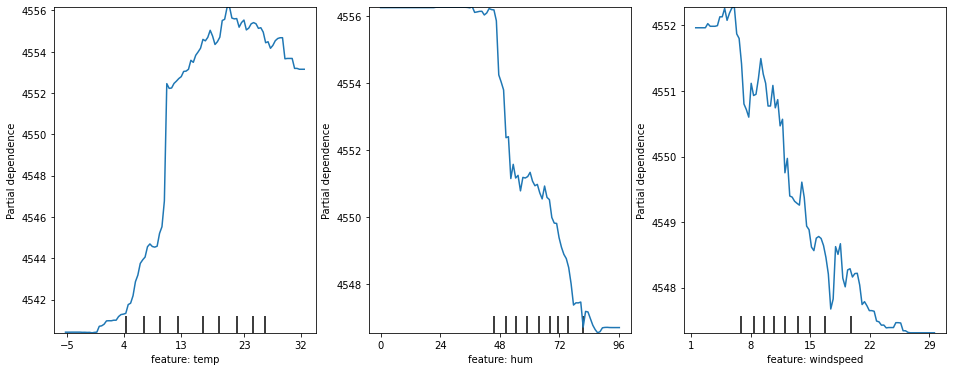

In [3]:
# partial dependence plot
features = ['ctemp','chum','cwindspeed']

# plot 2d partial dependency
plot_2d_pd(clf, X_train, features)

<BarContainer object of 4 artists>

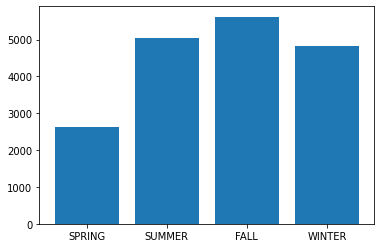

In [4]:
x = [] 
y = []

season_dict = {1:'SPRING', 2: 'SUMMER', 3: 'FALL', 4: 'WINTER'} 

for k,v in season_dict.items():
  df = pd.DataFrame(X_train,columns=X.columns)
  df = df[df.season == k]
  x.append(np.mean(clf.predict(df.values)))
  y.append(v)

plt.bar(y,x)

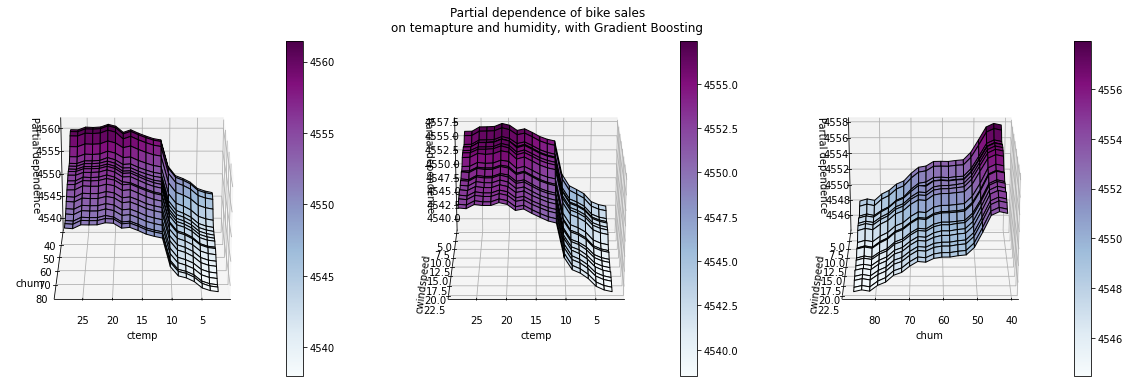

In [5]:
# all the continues features and all their combinations
features = ['ctemp','chum','cwindspeed']
features_comb=itertools.combinations(features, 2)

# plot 3d partial dependency of every 2 features
plot_3d_pd(clf, X_train, features, features_comb, grid_resolution=20, azim=90)
